In [2]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms
from torch.utils.data import Dataset,DataLoader
import numpy as np
import matplotlib.pyplot as plt


In [3]:
transform=transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize(0.5,0.5)])
train_dataset=datasets.MNIST('E:\pycharm\pytorch-practice.\data',train=True,transform=transform,download=False)
test_dataset=datasets.MNIST('E:\pycharm\pytorch-practice.\data',train=False,transform=transform,download=False)
train_loader=DataLoader(dataset=train_dataset,batch_size=64,shuffle=True)
test_loader=DataLoader(dataset=test_dataset,batch_size=64,shuffle=True)


In [32]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.net=nn.Sequential(
            nn.Conv2d(1,6,kernel_size=5,padding=2),
            nn.ReLU(),
            nn.AvgPool2d(kernel_size=2,stride=2),
            nn.Conv2d(6,16,kernel_size=5),
            nn.ReLU(),
            nn.AvgPool2d(kernel_size=2,stride=2),
            nn.Conv2d(16,120,kernel_size=5),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(120,84),nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(84,10),
        )
    def forward(self,x):
        return self.net(x)

In [33]:
X=torch.rand(size=(1,1,28,28))
for layer in CNN().net:
    X=layer(X)
    print(layer.__class__.__name__,'output shape:\t',X.shape)

Conv2d output shape:	 torch.Size([1, 6, 28, 28])
ReLU output shape:	 torch.Size([1, 6, 28, 28])
AvgPool2d output shape:	 torch.Size([1, 6, 14, 14])
Conv2d output shape:	 torch.Size([1, 16, 10, 10])
ReLU output shape:	 torch.Size([1, 16, 10, 10])
AvgPool2d output shape:	 torch.Size([1, 16, 5, 5])
Conv2d output shape:	 torch.Size([1, 120, 1, 1])
ReLU output shape:	 torch.Size([1, 120, 1, 1])
Flatten output shape:	 torch.Size([1, 120])
Linear output shape:	 torch.Size([1, 84])
ReLU output shape:	 torch.Size([1, 84])
Dropout output shape:	 torch.Size([1, 84])
Linear output shape:	 torch.Size([1, 10])


In [18]:
model=CNN().to('cuda:0')
loss_fn=nn.CrossEntropyLoss()
learning_rate=0.01
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)


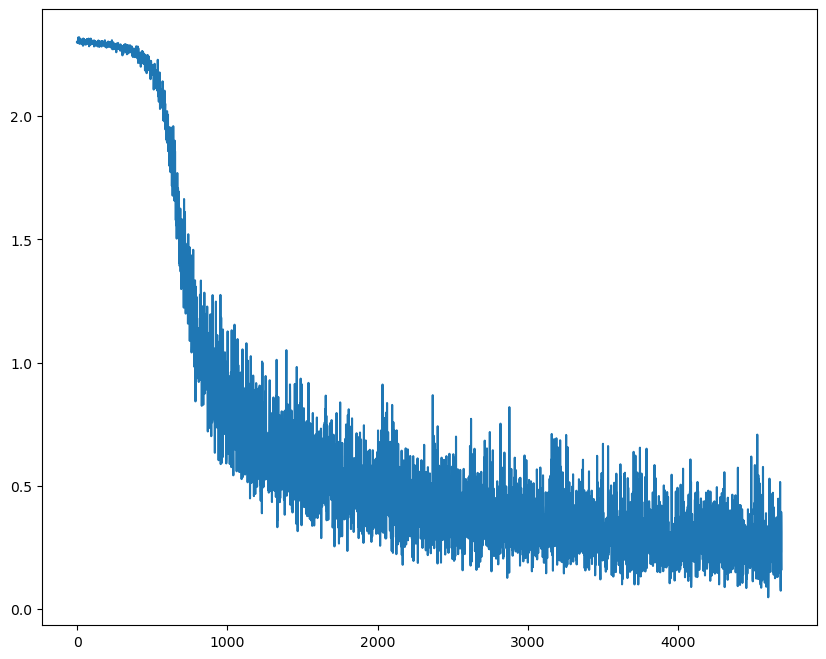

In [21]:
epochs=5
losses=[]
for epoch in range(epochs):
    for(x,y) in train_loader:
        x,y=x.to('cuda:0'),y.to('cuda:0')
        pred=model(x)
        loss=loss_fn(pred,y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
fig=plt.figure(figsize=(10,8))
plt.plot(range(len(losses)),losses)
plt.show()

In [34]:
correct=0
total=0
with torch.no_grad():
    for(x,y) in test_loader:
        x,y=x.to('cuda:0'),y.to('cuda:0')
        pred=model(x)
        _,predicted=torch.max(pred,dim=1)
        correct+=torch.sum(predicted==y)
        total+=y.size(0)
print(f"测试集精度:{100*correct/total}%")

测试集精度:92.55999755859375%
